#### Applied Machine Learning - Mini Project 4 (Tasnim Ahmed, ta1743)

In [1]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

# 1. KMeans & KMeans++ (with Blob Data)

## K-Means

In [2]:
from sklearn.datasets import make_blobs
clusters = 4
X_blob, y_blob = make_blobs(n_samples = 300, centers = clusters, cluster_std = 0.6, random_state = 4)

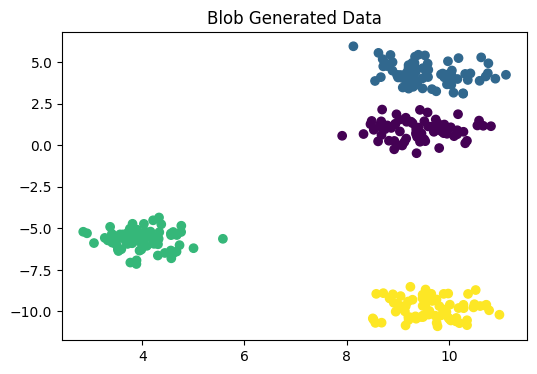

In [3]:
# plot the data
plt.figure(figsize=(6, 4))
plt.title("Blob Generated Data")
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob)
plt.show()

### Implement KMeans Function

In [107]:
def kmean_centroids(X, centroids):
    current_centroids = centroids
    centroid_update = True
    x_labels = []

    while centroid_update == True: 
        # create K clusters by assiging each point to the closest centroid
        clusters = create_clusters(X, centroids)
        
        # compute new centroid by avergaing the values in the clusters
        old_centroids = current_centroids
        current_centroids = update_centroids(clusters)
        
        # check if centroid changes, if no change then the optimum centroids have been found
        if np.array_equal(current_centroids, old_centroids):
            x_labels = sample_labels(X, clusters)
            centroid_update = False
            
    #return the optimized centroids and the labels for each sample
    return current_centroids, x_labels

def sample_labels(X, clusters):
    # each observation gets the label of the cluster that it was assigned to
    x_labels = np.empty(X.shape[0])
    for i in range(len(clusters)):
        for sample in clusters[i]:
            #find the index of that sample and use that index to set the cluster label in x_labels
            x_labels[np.where(X == sample)[0][0]] = i
            
    return x_labels

# for each point we calculate the distance, check the one that is closest and assign it to that cluster
def create_clusters(X, centroids):
    clusters = [[] for i in range(len(centroids))]
    for i in range(len(X)):
        X_distances = {}
        for j in range(len(centroids)): 
            X_distances[j] = np.sqrt(np.sum((X[i] - centroids[j])**2))

        #find the min value in the dictionary and assign the point to the corresponding cluster
        min_dist = min(X_distances, key = X_distances.get)
        clusters[min_dist].append(X[i])

    return clusters

def update_centroids(clusters):
    # get the mean of the clusters and assign it as the centroid of that cluster
    centroids = []
    for i in range(len(clusters)):
        avg = np.mean(clusters[i], axis = 0)
        centroids.append(avg)
    return centroids

def plot_graph(title, centroids, X, y):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c = y)
    for i in range(len(centroids)):
        plt.scatter(centroids[i][0],centroids[i][1], c = "0")
    plt.show()

#### Default Seed

In [61]:
np.random.seed()   # default seed   
initial_centroids = X_blob[np.random.choice(X_blob.shape[0], 4)] #randomly generated centroid indices

# plot the graph with these centroids
plot_graph("Before KMeans Fitting", initial_centroids, X_blob, y_blob)

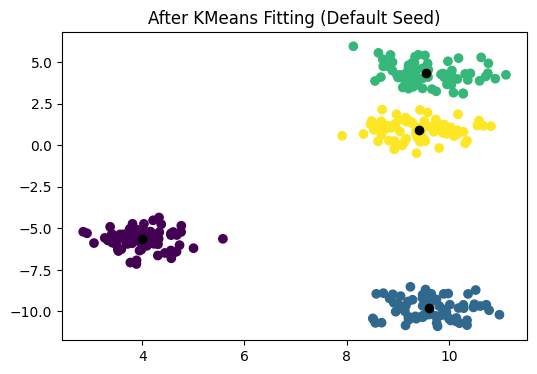

In [108]:
updated_centroids, labels = kmean_centroids(X_blob, centroids)

for i in range(100):
    updated_centroids, labels = kmean_centroids(X_blob, updated_centroids)
    
# plot the graph with the updated centroids
plot_graph("After KMeans Fitting (Default Seed)", updated_centroids, X_blob, labels)

#### Seed = 2

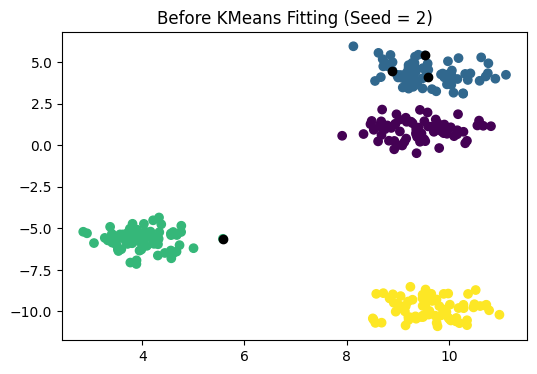

In [109]:
# seed = 2
np.random.seed(2)
initial_centroids_2 = X_blob[np.random.choice(X_blob.shape[0], 4)]   # randomly generated centroids 

# plot the graph with the randomized centroids
plot_graph("Before KMeans Fitting (Seed = 2)", centroids_2, X_blob, y_blob)

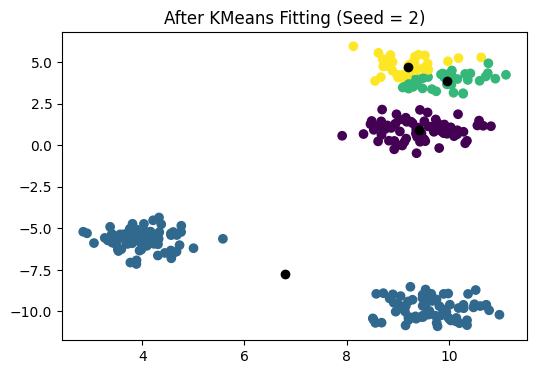

In [110]:
updated_centroids_2, labels_2 = kmean_centroids(X_blob, centroids_2)
for i in range(100):
    updated_centroids_2, labels_2 = kmean_centroids(X_blob, updated_centroids_2)

# plot the graph with the updated centroids
plot_graph("After KMeans Fitting (Seed = 2)", updated_centroids_2, X_blob, labels_2)

### Default Seed and Seed = 2 Result Comparison

They are different because in default seed it is randomized

### K-Means ++

In [125]:
def kmeanplus_centroids(X, centroid, K):
    
    initial_centroids = centroid
    
    #calculate the distance between the first centroid and the other points
    #distances = [np.sqrt(np.sum((centroids[i] - X[j])**2)) for j in range(len(X))]

    for i in range(K - 1):
        distances = []
        for j in range(len(X)):
            d = 99999
            
            for k in range(len(initial_centroids)):
                calc_distance = np.sqrt(np.sum((X[j] - initial_centroids[k])**2))
                if calc_distance < d: 
                    d = calc_distance
                
            distances.append(d)
        
        distances = np.array(distances)
        max_dist = X[np.argmax(distances)] # find the point with the maximum distance and make it the new centroid 
        initial_centroids.append(max_dist)
        
    
    updated_centroid, x_labels = kmean_centroids(X, initial_centroids)
    
    return updated_centroid, x_labels, initial_centroids

In [136]:
# Default Seed
np.random.seed()

centroid_idx = np.random.choice(X_blob.shape[0], 1)
random_centroid = [X_blob[centroid_idx][0].tolist()]

updated_centroids, x_labels, initial_centroids  = kmeanplus_centroids(X_blob, random_centroid, 4)
for i in range(100):
    updated_centroids, x_labels = kmean_centroids(X_blob, updated_centroids)

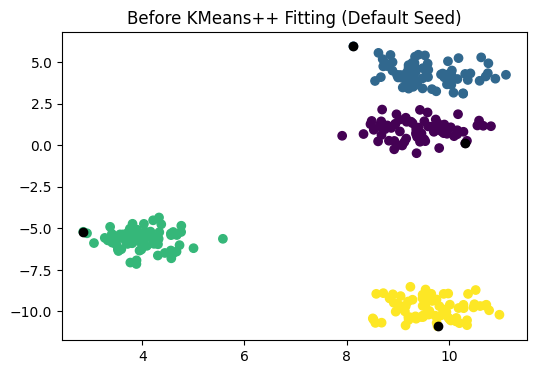

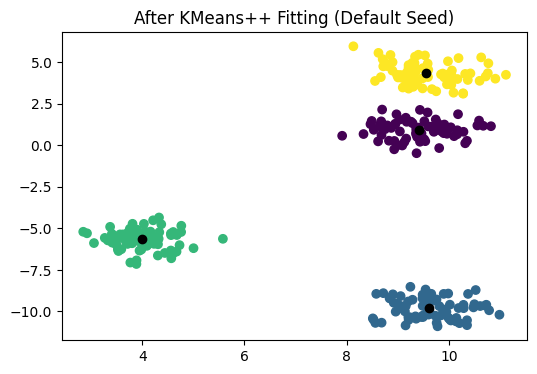

In [137]:
# plot the graph with the updated centroids
plot_graph("Before KMeans++ Fitting (Default Seed)", initial_centroids, X_blob, y_blob)

# plot the graph with the updated centroids
plot_graph("After KMeans++ Fitting (Default Seed)", updated_centroids, X_blob, x_labels)

In [140]:
# Seed = 2
np.random.seed(2)

centroid_idx_2 = np.random.choice(X_blob.shape[0], 1)
random_centroid_2 = [X_blob[centroid_idx_2][0].tolist()]

updated_centroids_2, x_labels_2, initial_centroids_2  = kmeanplus_centroids(X_blob, random_centroid_2, 4)
for i in range(100):
    updated_centroids_2, x_labels_2 = kmean_centroids(X_blob, updated_centroids_2)

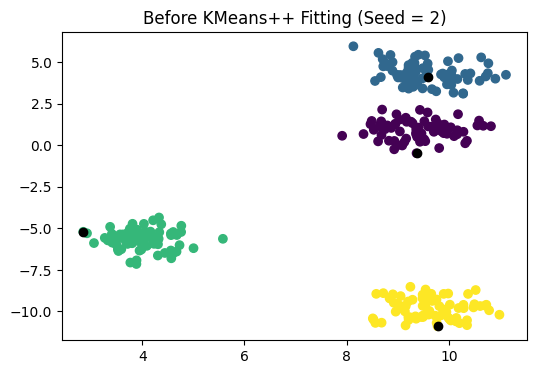

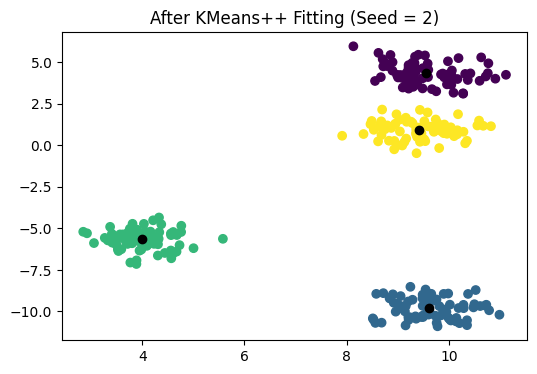

In [141]:
# plot the graph with the updated centroids
plot_graph("Before KMeans++ Fitting (Seed = 2)", initial_centroids_2, X_blob, y_blob)

# plot the graph with the updated centroids
plot_graph("After KMeans++ Fitting (Seed = 2)", updated_centroids_2, X_blob, x_labels_2)

# 2. RGB Image Cluster

In [ ]:
from PIL import Image 
import cv2
from numpy import asarray

In [ ]:
# Use an RGB image to cluster the R,G,B data into K clusters to demonstrate image compression. 
#Display images before and after

#RBG - 3d - tryign to compress th eimage
#x - black to red
# z - black to green
#


# clusters at the corners

#256/10(# of clusters) = 25.6, 

# every point that belongs to the cluster is represented by the mean


# 3.  PCA Part 1 (Users to Movies)

In [ ]:
# only call the singular vector decomposition
# check the textbook for svd
# 

# it is already ordered - c1 has more variance or something like that and so on

# first center the data - m - mean - 
# find the svd

#plot the eigen values

# can also use np.lin.eig instead of svd

# understanding pcs step by step -the nobles

#use np.matmul() - data, the number of eigen vectors (pca?).T

#var = 0

#add components until variances is 90% - try a while loop here



# 4. PCA Part 2 (Human Faces)

In [ ]:
# for picture after centerin git
# find the projection 


# then uncenter it - by adding the average back 